In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Максимальное количество слов
num_words = 10000
# Максимальная длина комментария
max_comment_len = 50

In [48]:
train = pd.read_csv('toxicCommentsDataSet/toxicCommentsTrain.csv')

In [49]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [50]:
comments = train['comment_text']

In [51]:
y_train = train[['toxic', 'severe_toxic', 'obscene',	'threat',	'insult',	'identity_hate']]

In [52]:
tokenizer = Tokenizer(num_words=num_words)

In [53]:
tokenizer.fit_on_texts(comments)

In [54]:
sequences = tokenizer.texts_to_sequences(comments)

In [55]:
x_train = pad_sequences(sequences, maxlen=max_comment_len)

In [56]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 900, input_length=max_comment_len))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(40, return_sequences=True))
model_lstm.add(GRU(40))
model_lstm.add(Dense(6, activation='sigmoid'))

In [57]:
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', 'AUC'])

In [58]:
model_lstm_save_path = 'best_model_lstm.h5'
#checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path,
                                           #monitor='val_accuracy',
                                           #save_best_only=True,
                                           #verbose=1)

In [59]:
history_lstm = model_lstm.fit(x_train,
                              y_train,
                              epochs=15,
                              batch_size=512)

Epoch 1/15
312/312 [==============================] - 194s 597ms/step - loss: 0.1218 - accuracy: 0.9364 - auc: 0.8777
Epoch 2/15
312/312 [==============================] - 187s 599ms/step - loss: 0.0532 - accuracy: 0.9941 - auc: 0.9758
Epoch 3/15
312/312 [==============================] - 187s 600ms/step - loss: 0.0480 - accuracy: 0.9940 - auc: 0.9798
Epoch 4/15
312/312 [==============================] - 186s 597ms/step - loss: 0.0442 - accuracy: 0.9939 - auc: 0.9829
Epoch 5/15
312/312 [==============================] - 187s 600ms/step - loss: 0.0403 - accuracy: 0.9937 - auc: 0.9860
Epoch 6/15
312/312 [==============================] - 187s 599ms/step - loss: 0.0369 - accuracy: 0.9927 - auc: 0.9883
Epoch 7/15
312/312 [==============================] - 185s 594ms/step - loss: 0.0339 - accuracy: 0.9923 - auc: 0.9901
Epoch 8/15
312/312 [==============================] - 186s 596ms/step - loss: 0.0311 - accuracy: 0.9893 - auc: 0.9916
Epoch 9/15
312/312 [==============================] - 18

KeyError: 'val_accuracy'

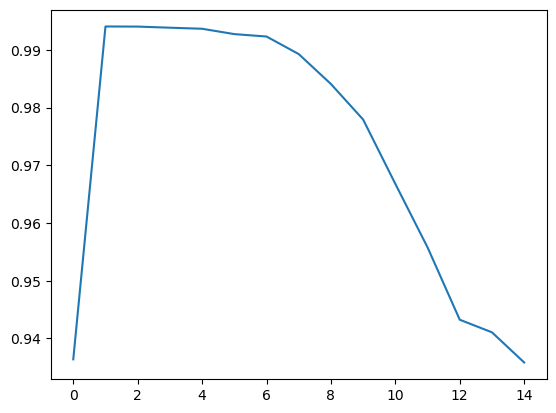

In [60]:
plt.plot(history_lstm.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [61]:
test_comments = pd.read_csv('toxicCommentsDataSet/toxicCommentsTest.csv')

In [62]:
test_labels = pd.read_csv('toxicCommentsDataSet/toxicCommentsTestLabels.csv')

In [63]:
test_full = pd.merge(test_comments, test_labels, on='id')

In [64]:
test = test_full[test_full['toxic']!=-1]

In [65]:
test_sequences = tokenizer.texts_to_sequences(test['comment_text'])

In [66]:
x_test = pad_sequences(test_sequences, maxlen=max_comment_len)

In [67]:
y_test = test[['toxic',	'severe_toxic',	'obscene', 'threat',	'insult',	'identity_hate']]

In [68]:
model_lstm.load_weights(model_lstm_save_path)

ValueError: Invalid bias shape: (160,)

In [70]:
model_lstm.evaluate(x_test, y_test, verbose=1)

2000/2000 [==============================] - 237s 119ms/step - loss: 0.1125 - accuracy: 0.9163 - auc: 0.9300


[0.1125301942229271, 0.9162837266921997, 0.9299763441085815]

In [ ]:
comment = "COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK"

In [ ]:
sequence = tokenizer.texts_to_sequences([comment])

In [ ]:
data = pad_sequences(sequence, maxlen=max_comment_len)

In [ ]:
model_lstm.predict(data)